In [1]:
import numpy as np

import matplotlib.pyplot as plt
# plt.style.use("dark_background")

import ai_prentice_wasserstein
import utils

from time import time

In [2]:
coupled_oscillator_data = np.load("trajectories/coupled_oscillator.npz")
data = coupled_oscillator_data["data"]

In [3]:
ai_prentice = ai_prentice_wasserstein.DimensionalityPrentice("coupled_oscillator")

In [4]:
ai_prentice.fit(data)

Normalizing
Computing distance matrix
Embedding data and computing scores
Computing the dimensionality


In [5]:
embedding = ai_prentice.embeddings[2]
energies = coupled_oscillator_data["params"]

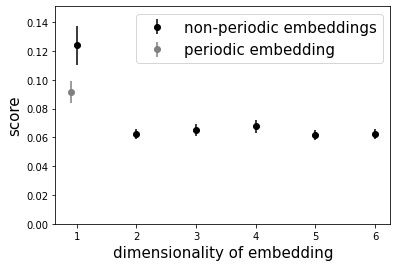

In [6]:
utils.plot_scores(plt.gca(), ai_prentice.scores, ai_prentice.errors)
plt.savefig("co_scores.pdf")
plt.show()

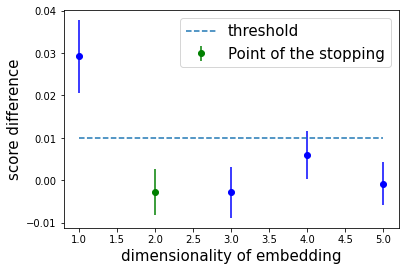

In [7]:
utils.plot_score_diffs(plt.gca(), ai_prentice.scores, ai_prentice.errors, ai_prentice.dimensionality, ai_prentice.threshold)
plt.savefig("co_diffs.pdf")
plt.show()

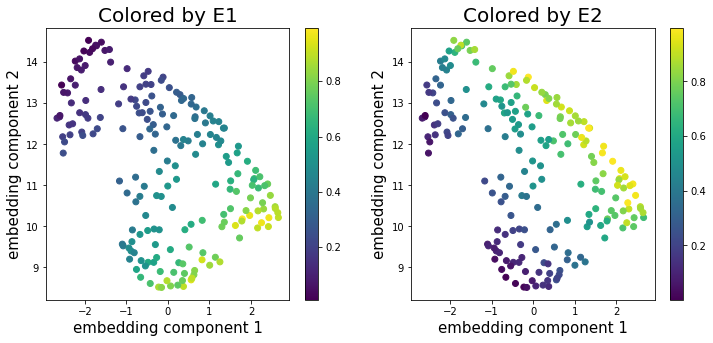

In [8]:
utils.plot_all_2d(*plt.subplots(1, 2, figsize=(12, 5)), embedding, energies, ["E1", "E2"])
plt.savefig("co_energy.pdf")
plt.show()

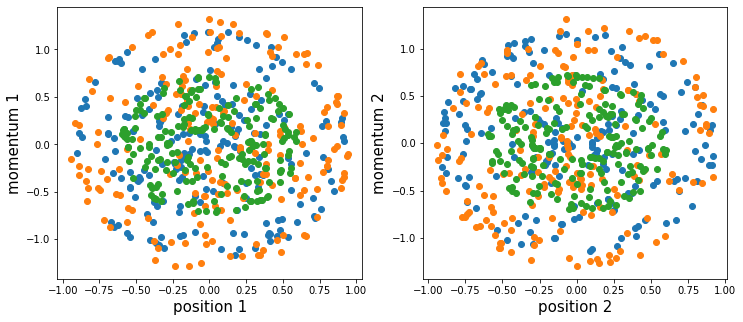

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for traj in data[:3]:
    axes[0].scatter(*traj[:, [0, 2]].T)
axes[0].set_xlabel("position 1", fontsize=15)
axes[0].set_ylabel("momentum 1", fontsize=15)

for traj in data[:3]:
    axes[1].scatter(*traj[:, [1, 3]].T)
axes[1].set_xlabel("position 2", fontsize=15)
axes[1].set_ylabel("momentum 2", fontsize=15)

plt.savefig("co_data.pdf")
plt.show()

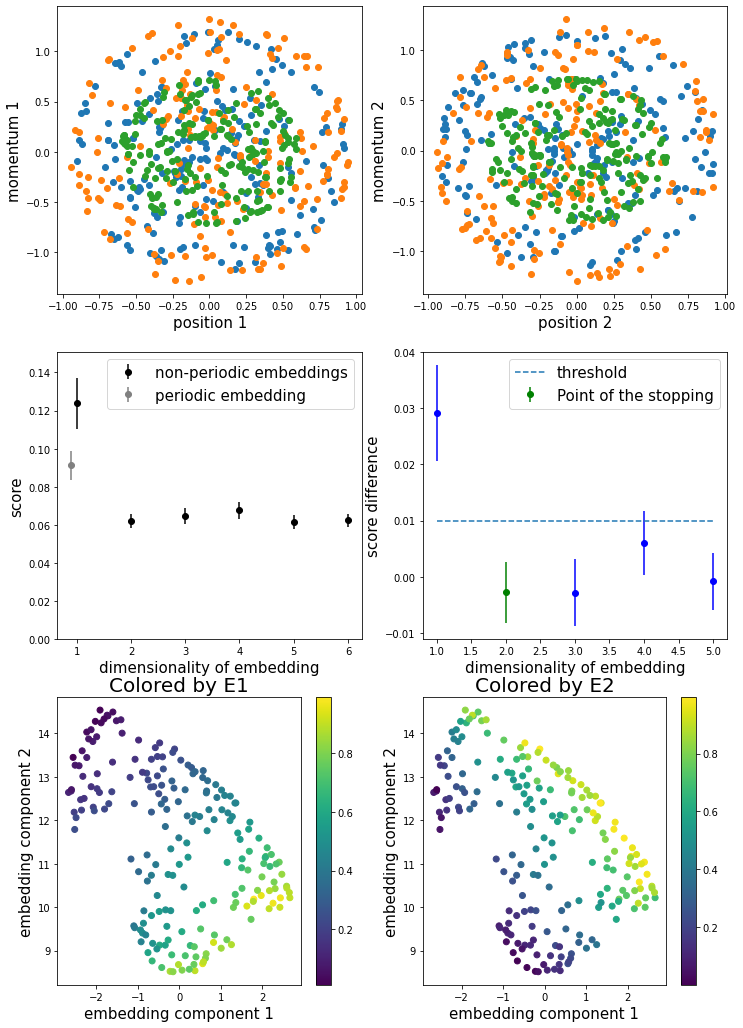

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

ax = axes[0][0]
for traj in data[:3]:
    ax.scatter(*traj[:, [0, 2]].T)
ax.set_xlabel("position 1", fontsize=15)
ax.set_ylabel("momentum 1", fontsize=15)

ax = axes[0][1]
for traj in data[:3]:
    ax.scatter(*traj[:, [1, 3]].T)
ax.set_xlabel("position 2", fontsize=15)
ax.set_ylabel("momentum 2", fontsize=15)

utils.plot_scores(axes[1][0], ai_prentice.scores, ai_prentice.errors)
utils.plot_score_diffs(axes[1][1], ai_prentice.scores, ai_prentice.errors, ai_prentice.dimensionality, ai_prentice.threshold)

utils.plot_all_2d(fig, axes[2], embedding, energies, ["E1", "E2"])

plt.savefig("co_all.pdf")